In [32]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

id_in = r'D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_ID_scores.data'
scores_in = r'D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_column_scores.data'

id_fh = open(id_in, 'r')
id_scores = id_fh.readline()    # only 1 line in file
id_list = list(eval(id_scores))
num_columns = len(id_list)

id_list2 = [x for x in id_list if x != ('x', 1.0)]    # lose column position, might need later
# print(id_list)

scores_fh = open(scores_in, 'r')
scores = scores_fh.readline()
scores_list = list(eval(scores))
scores_list2 = [x for x in scores_list if 'X' not in x]
# print(scores_list)

In [46]:
id_aa = []
id_percent = []
for aa, percent in id_list2:
    id_aa.append(aa)
    id_percent.append(percent*100)
    
cons_score = []
freq_score = []
for cons, freq in scores_list2:
    cons_score.append(cons)
    freq_score.append(freq)
    

df = pd.DataFrame(np.array([id_aa, id_percent, cons_score, freq_score]), 
                  index=['Identity', 'Percent Identity', 'Avg Blosum62 Score', 'Avg Frequency Score'])
print(df)

                                   0                     1    \
Identity                             M                     R   
Percent Identity     91.83673469387756     28.57142857142857   
Avg Blosum62 Score                 5.0  -0.15961945031712474   
Avg Frequency Score                1.0    0.5227272727272727   

                                    2                   3    \
Identity                              I                   N   
Percent Identity      55.10204081632652   71.42857142857143   
Avg Blosum62 Score    3.008080808080808  3.3217391304347825   
Avg Frequency Score  0.6444444444444445  0.6086956521739131   

                                    4                   5    \
Identity                              T                   N   
Percent Identity       65.3061224489796   91.83673469387756   
Avg Blosum62 Score   1.9739130434782608  5.6521739130434785   
Avg Frequency Score  0.6304347826086957  0.6739130434782609   

                                    6          

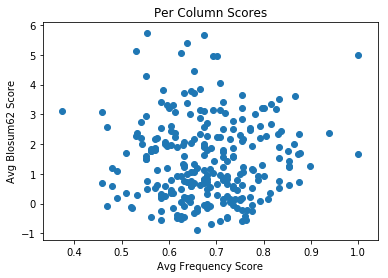

In [49]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
%matplotlib inline
plt.scatter(freq_score, cons_score)
plt.title("Per Column Scores")
plt.xlabel('Avg Frequency Score')
plt.ylabel("Avg Blosum62 Score")
plt.show()
